### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Importing the Dataset

In [2]:
dataset =pd.read_excel('MRT Prediction Database for ICMIME.xlsx')

### Deal with Outliers and High Leverage Points

In [3]:
# Step 1: Remove Outliers using Z-scores
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Only numeric columns
    outliers = (z_scores > threshold).any(axis=1)
    print(f"Number of outliers detected: {outliers.sum()}")
    return df[~outliers]
# Apply outlier removal
response_column = 'Globe temperature (°C) [MRT]'  # Replace with the actual target column name in your dataset
dataset_clean = remove_outliers_zscore(dataset)

# Dataset is now ready for any machine learning model
print(f"Shape of dataset after cleaning: {dataset_clean.shape}")

Number of outliers detected: 694
Shape of dataset after cleaning: (21033, 4)


### Printing Maximum and Minimum Values of Every Variables

In [4]:
# Print the max and min value of every variable after removing outliers
max_values = dataset_clean.max()  # Maximum values of each column
min_values = dataset_clean.min()  # Minimum values of each column

# Printing the results
print("Maximum values of each variable after removing outliers:")
print(max_values)

print("\nMinimum values of each variable after removing outliers:")
print(min_values)


Maximum values of each variable after removing outliers:
Air temperature (°C)            36.40
Radiant temperature (°C)        36.90
Air velocity (m/s)               0.93
Globe temperature (°C) [MRT]    36.60
dtype: float64

Minimum values of each variable after removing outliers:
Air temperature (°C)            12.2
Radiant temperature (°C)        12.4
Air velocity (m/s)               0.0
Globe temperature (°C) [MRT]    12.4
dtype: float64


### Cleaned Dataset for Training and Testing

In [5]:
X = dataset_clean.iloc[:, :-1]
y = dataset_clean.iloc[:, -1]

### Spliting the Dataset inti Training and Test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Polynomial Regression Model on the Training Set

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

### Predicting the Test set results

In [8]:
y_pred_poly = poly_model.predict(X_test_poly)
y_train_pred_poly = poly_model.predict(X_train_poly)

In [9]:
comparison_df = pd.DataFrame({
    'True Value': y_test,
    'Predicted Value': y_pred_poly
})
print(comparison_df.to_string(index=False))

 True Value  Predicted Value
       18.2        18.502757
       22.7        22.753953
       23.6        23.617079
       25.7        25.440444
       31.9        31.911426
       24.3        24.243744
       24.2        24.079391
       31.4        31.529231
       27.3        27.203515
       22.7        22.623857
       24.8        24.731027
       26.4        26.403431
       14.3        14.486169
       24.1        23.994379
       17.8        17.155264
       21.2        20.804576
       21.9        21.841207
       30.0        29.990517
       23.5        23.500436
       27.3        27.315012
       21.6        21.139190
       29.2        29.031566
       23.7        23.767891
       30.0        30.014061
       21.5        21.421975
       22.9        22.732005
       29.4        29.399952
       27.8        27.853514
       24.8        24.830168
       31.6        31.373813
       22.7        22.576077
       26.8        26.875235
       23.8        23.874780
       23.2   

Generating Polynomial Equation

In [10]:
# Extract coefficients and intercept
coefficients = poly_model.coef_
intercept = poly_model.intercept_

# Get feature names
feature_names = poly.get_feature_names_out(input_features=X.columns)

# Print polynomial equation
def print_polynomial_equation(coefficients, intercept, feature_names):
    terms = []
    for i, coef in enumerate(coefficients):
        if coef != 0:
            terms.append(f"{coef:.3f} * {feature_names[i]}")
    
    equation = " + ".join(terms)
    print(f"Globe Temperature (°C) = {intercept:.3f} + {equation}")

print_polynomial_equation(coefficients, intercept, feature_names)

Globe Temperature (°C) = -0.128 + 0.797 * Air temperature (°C) + 0.216 * Radiant temperature (°C) + -0.270 * Air velocity (m/s) + -0.027 * Air temperature (°C)^2 + 0.040 * Air temperature (°C) Radiant temperature (°C) + 0.316 * Air temperature (°C) Air velocity (m/s) + -0.014 * Radiant temperature (°C)^2 + -0.317 * Radiant temperature (°C) Air velocity (m/s) + 0.313 * Air velocity (m/s)^2


### Error Measurement of Train Set

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
train_mse = mean_squared_error(y_train, y_train_pred_poly)
train_mae = mean_absolute_error(y_train, y_train_pred_poly)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_poly)
train_r_squared = r2_score(y_train, y_train_pred_poly)

print(f"\nMean Squared Error (MSE) of Train Set: {train_mse:.5f}")
print(f"Mean Absolute Error (MAE) of Train Set: {train_mae:.5f}")
print(f"Mean Absolute Percentage Error (MAPE) of Train Set: {train_mape:.5f}")
print(f"R-squared (R²) of Train Set: {train_r_squared:.5f}")


Mean Squared Error (MSE) of Train Set: 0.06356
Mean Absolute Error (MAE) of Train Set: 0.13303
Mean Absolute Percentage Error (MAPE) of Train Set: 0.00558
R-squared (R²) of Train Set: 0.99524


### Errors Measurement of Test Set

In [12]:
test_mse = mean_squared_error(y_test, y_pred_poly)
test_mae = mean_absolute_error(y_test, y_pred_poly)
test_mape = mean_absolute_percentage_error(y_test, y_pred_poly)
test_r_squared = r2_score(y_test, y_pred_poly)

print(f"\nMean Squared Error (MSE) of Test Set: {test_mse:.5f}")
print(f"Mean Absolute Error (MAE) of Test Set: {test_mae:.5f}")
print(f"Mean Absolute Percentage Error (MAPE) of Test Set: {test_mape:.5f}")
print(f"R-squared (R²) of Test Set: {test_r_squared:.5f}")


Mean Squared Error (MSE) of Test Set: 0.07672
Mean Absolute Error (MAE) of Test Set: 0.13364
Mean Absolute Percentage Error (MAPE) of Test Set: 0.00559
R-squared (R²) of Test Set: 0.99428


### Model Evaluation

In [13]:
# Printing MSE for Training and Test Sets
print(f"Training Set - Mean Squared Error (MSE): {train_mse:.5f}")
print(f"Test Set - Mean Squared Error (MSE): {test_mse:.5f}\n")

# Commenting on Model Fit based on MSE
if abs(train_mse - test_mse) < 0.1:  # Threshold for difference between train and test MSE
    print("Model has a Good Fit.")
elif test_mse > train_mse:
    print("Model is Overfitting.")
else:
    print("Model is Underfitting.")


Training Set - Mean Squared Error (MSE): 0.06356
Test Set - Mean Squared Error (MSE): 0.07672

Model has a Good Fit.


Ploting

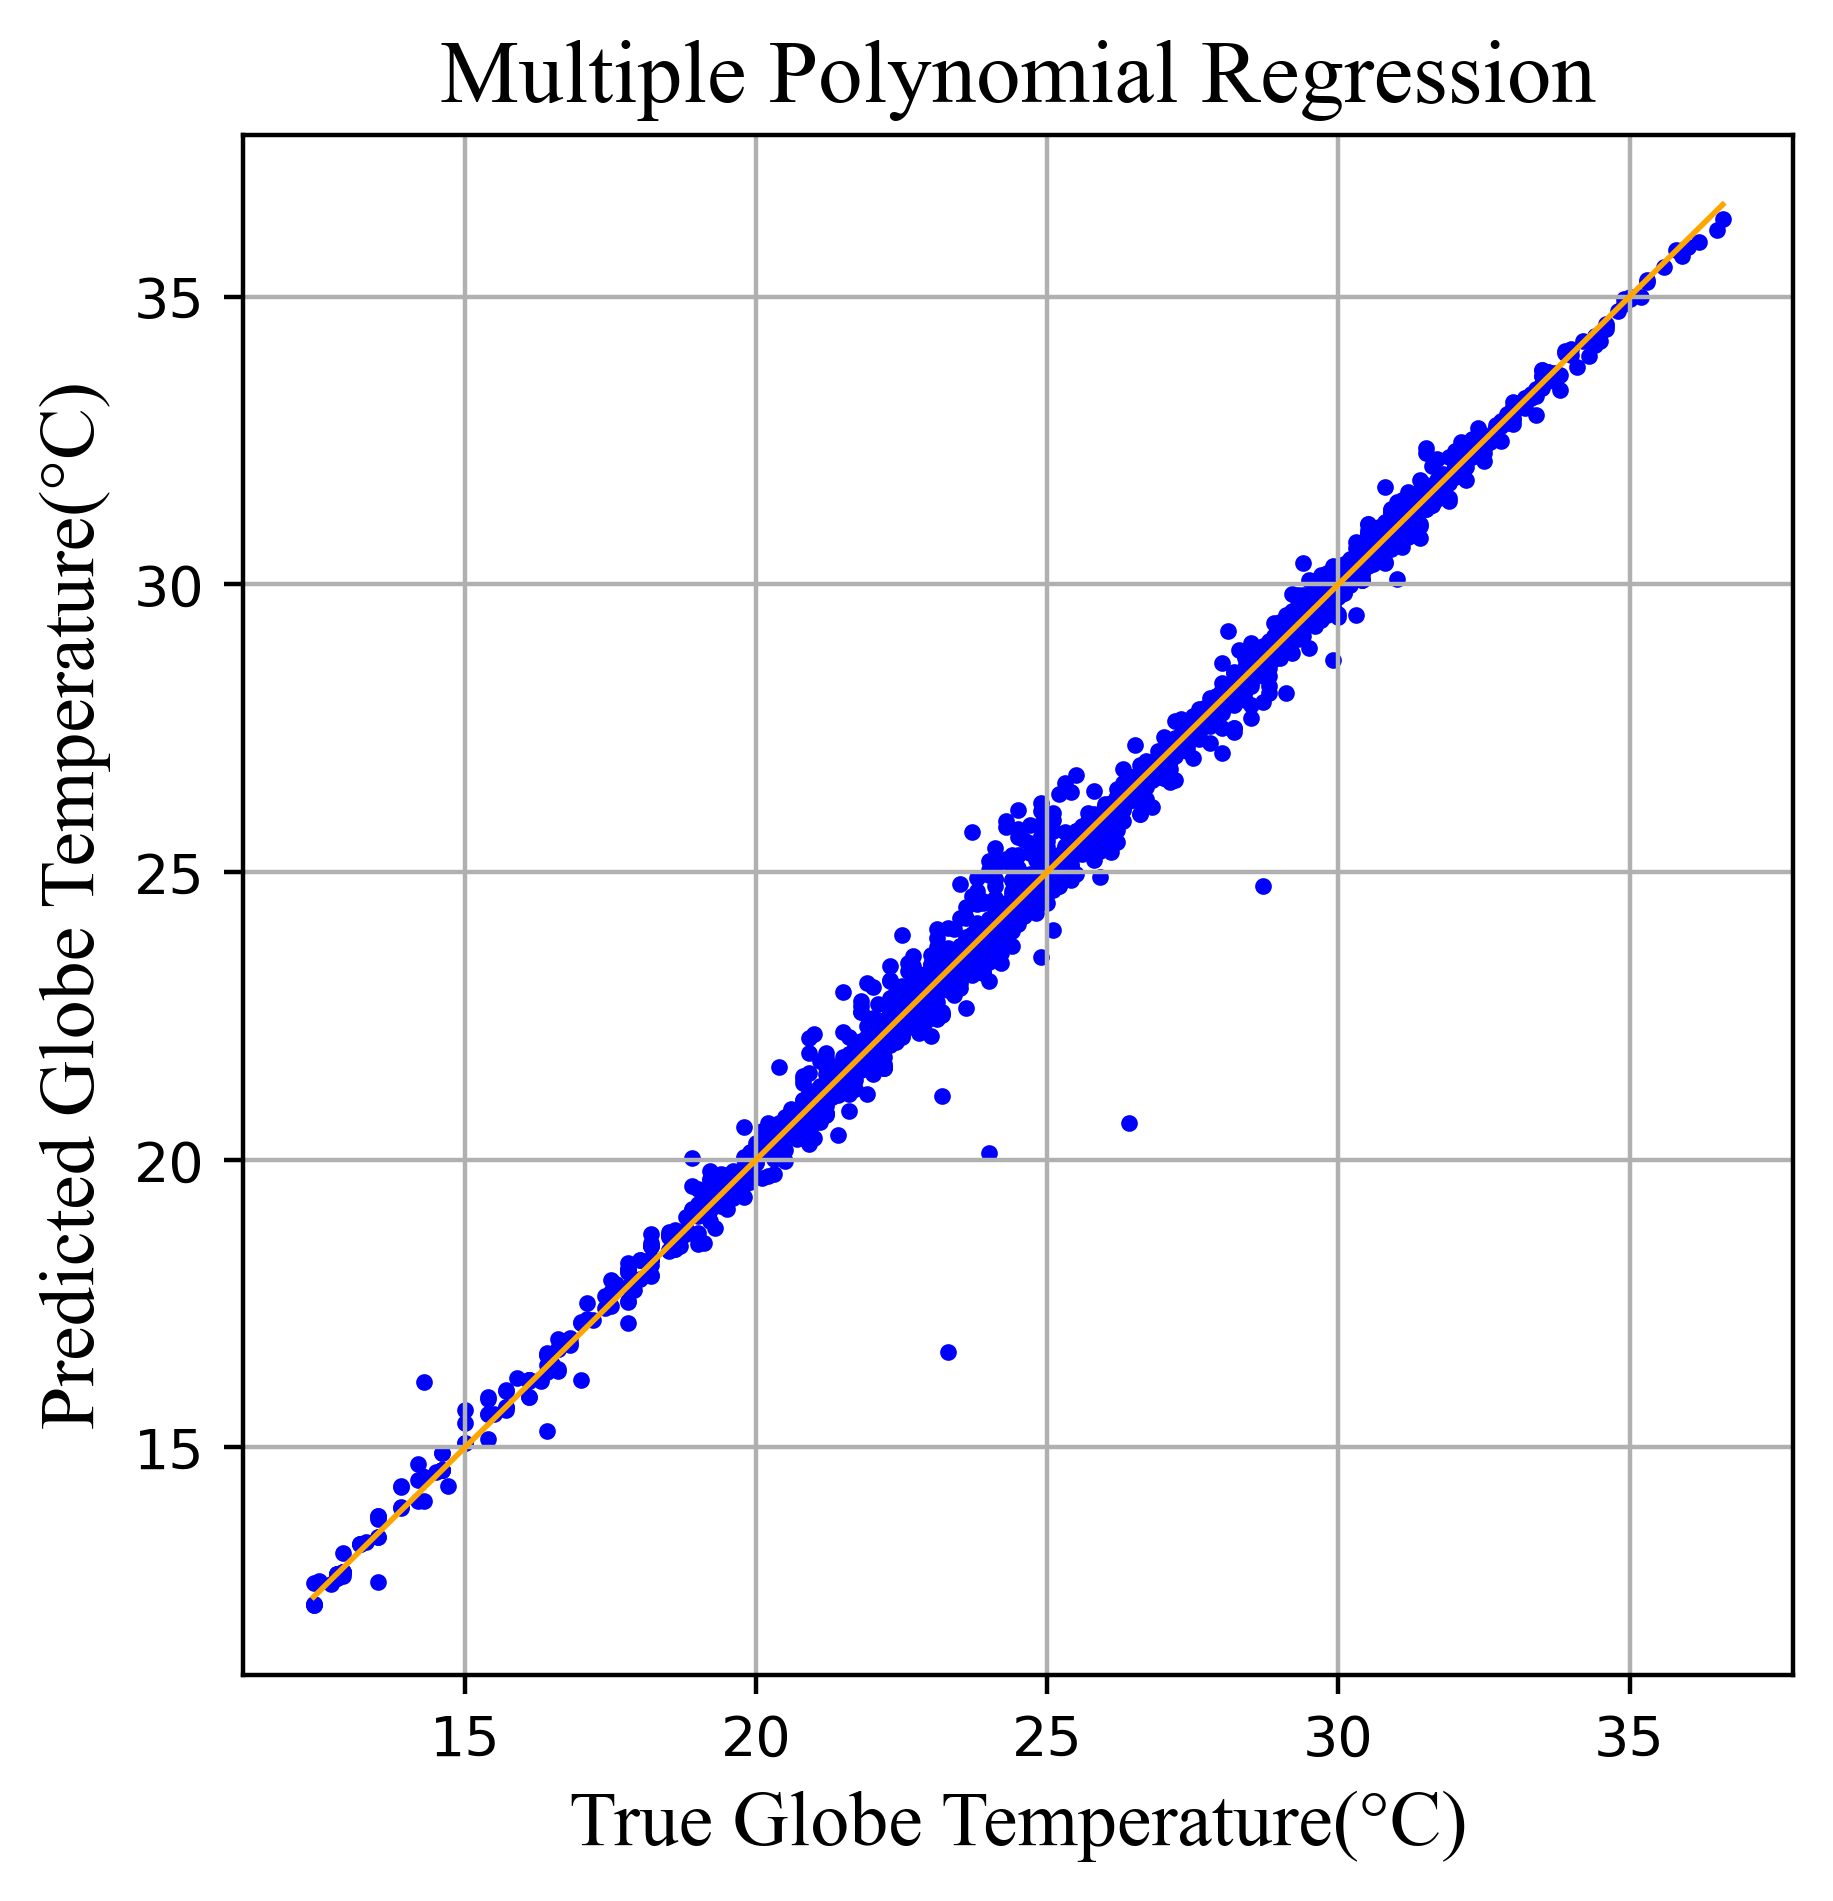

In [14]:
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.scatter(y_test, y_pred_poly, color='blue',s=4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', lw=1)
plt.title('Multiple Polynomial Regression',fontname='Times New Roman', fontsize=16)
plt.xlabel('True Globe Temperature(°C)',fontname='Times New Roman', fontsize=14)
plt.ylabel('Predicted Globe Temperature(°C)',fontname='Times New Roman', fontsize=14)
plt.grid(True)
plt.show()

### MSE vs Degree of Polynomial (1 to 10)

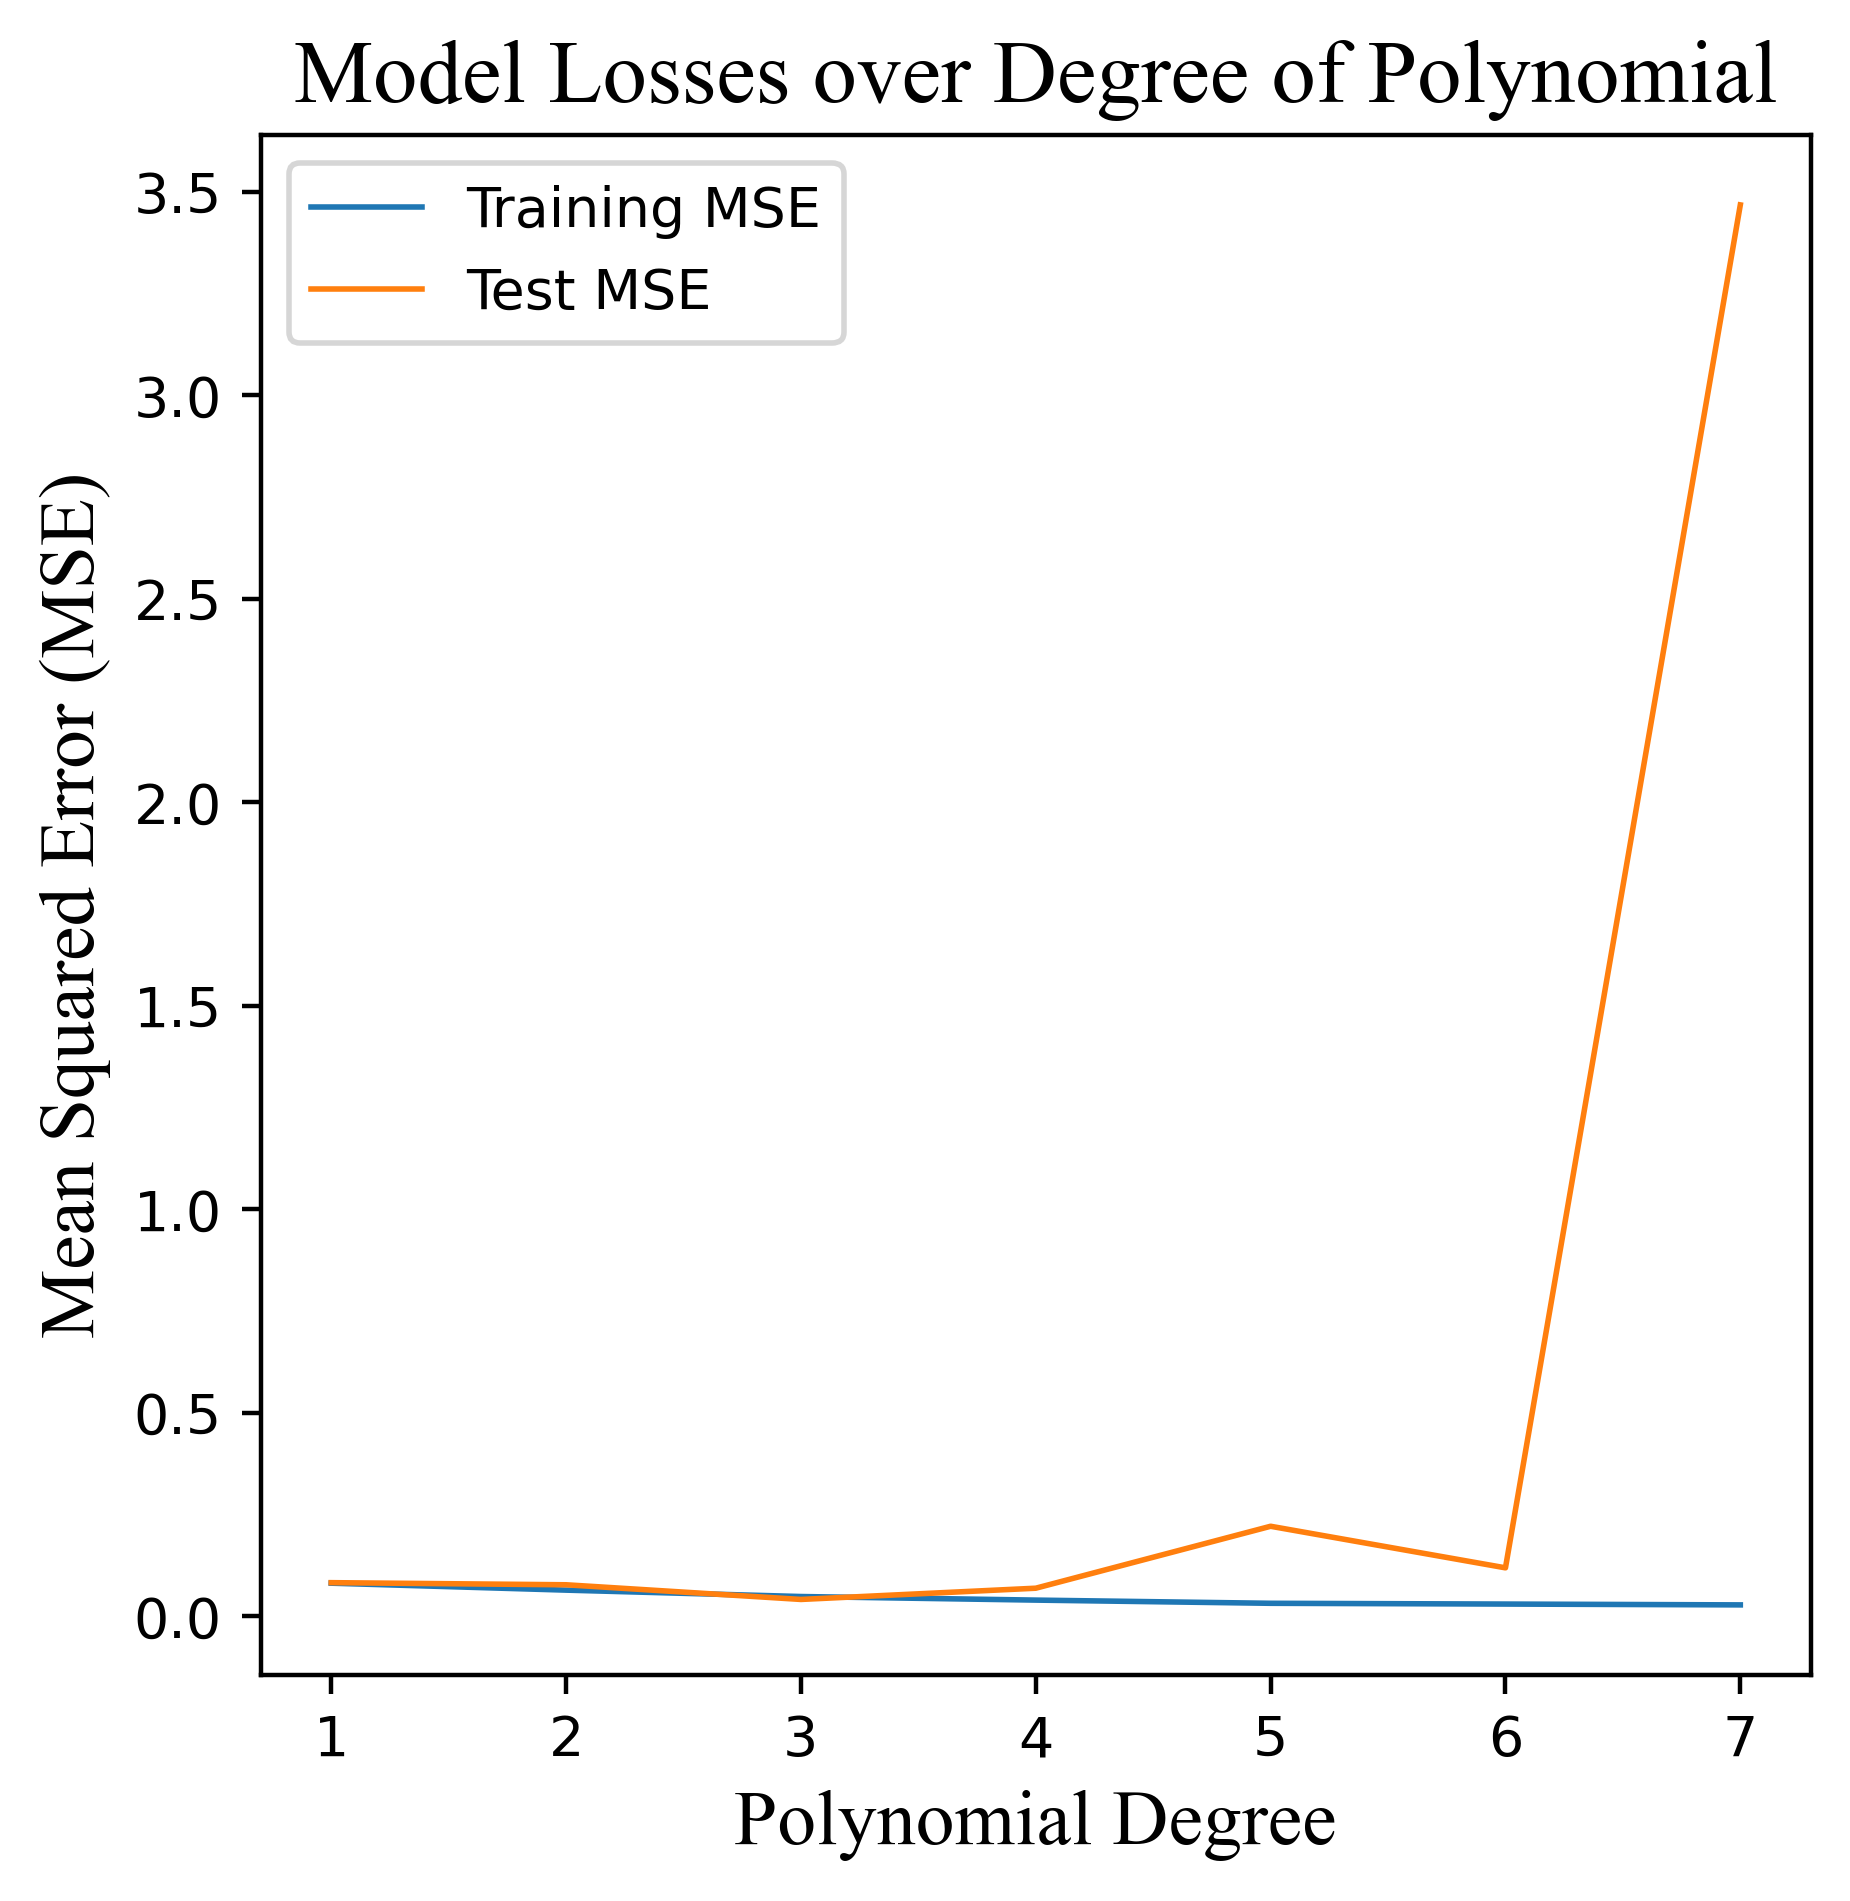

In [15]:
### Plotting MSE for Increasing Polynomial Degrees

# Initialize lists to store MSE values for train and test sets
train_mse_list = []
test_mse_list = []
degrees = range(1, 8)  # You can adjust the range based on how many degrees you want to test

for degree in degrees:
    # Step 1: Transform data for the current polynomial degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Step 2: Train the model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # Step 3: Predict on train and test sets
    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)
    
    # Step 4: Calculate MSE for both sets
    train_mse = mean_squared_error(y_train, y_train_pred_poly)
    test_mse = mean_squared_error(y_test, y_test_pred_poly)
    
    # Step 5: Append the MSE to the lists
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Step 6: Plotting the MSE for different degrees
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.plot(degrees, train_mse_list, label='Training MSE', linestyle='-',lw =1)
plt.plot(degrees, test_mse_list, label='Test MSE', linestyle='-',lw = 1)
plt.title('Model Losses over Degree of Polynomial', fontname='Times New Roman', fontsize=16)
plt.xlabel('Polynomial Degree', fontname='Times New Roman', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontname='Times New Roman', fontsize=14)
plt.grid(False)
plt.legend()
plt.show()
